In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading data set file in to data frame.
import pandas as pd
file_path = r"C:\Users\Anurag Singh\Downloads\loan.csv"
#using low memory flag to load columns with multiple data types.
data = pd.read_csv(file_path, low_memory=False)
data.head()

FileNotFoundError: [Errno 2] File C:\Users\Anurag Singh\Downloads\loan.csv does not exist: 'C:\\Users\\Anurag Singh\\Downloads\\loan.csv'

In [ ]:
data.tail()

In [ ]:
#Shape deatils of the Data
data.shape

In [ ]:
# Finding datatype in all coulmns
data.dtypes

In [ ]:
#Finding Null Column
data.isnull()

In [ ]:
data.isnull().sum()

In [ ]:
#Finding percentage of null or missing values
null_percentage = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_percentage[ null_percentage > 0 ]

 It is observed that there are a lot of columns with all null values. Let's first remove them

In [ ]:
data.dropna(axis = 1, how = 'all', inplace = True)
data.head()

In [ ]:
#Finding number of unique values in each vcolumn
data.nunique().sort_values().head(10)

'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [ ]:
#Dropping Columns with only one values.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [ ]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(12)

emp_title, and title columns have text values which are more unique values.

In [ ]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

id, url, and member_id are having exact same values which means any one of these can be used as primary key. Hence lets just keep id and drop member_id and url.

In [ ]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

Checking again the null Values

In [ ]:
data.isnull().sum()

In [ ]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Data type conversions

In [ ]:
# Finding datatype in all coulmns
data.dtypes

int_rate and revol_util are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [ ]:
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

issue_d, earliest_cr_line are having date values, let convert column data type to date.

In [ ]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [ ]:
# Converted to proper datatypes for analysis
data.dtypes

# Outlier Treatment

In [ ]:
sns.boxplot(data['annual_inc'])

Clearly indincating the presence of outliers.
So, Removing them.
Let's see the quantile info and take an appropriate action.
The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.95

In [ ]:
quantile_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

In [ ]:
per_95_annual_inc = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= per_95_annual_inc]

In [ ]:
sns.boxplot(data.annual_inc)

In [ ]:
sns.boxplot(data.dti)

In [ ]:
sns.boxplot(data.loan_amnt)

In [ ]:
data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

In [ ]:
sns.boxplot(data.funded_amnt_inv)

In [ ]:
data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

# Univariate Analysis
## Loan Amount

In [ ]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [ ]:
#Stats of laon amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Observations:
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

# funded_amnt
The total amount committed to that loan at that point in time.

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [ ]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Observations: Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

### Installment
The monthly payment owed by the borrower if the loan originates.

In [ ]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()


Observations: The Most representative value of Installment amount in around 280.

## annual_inc
The self-reported annual income provided by the borrower during registration.

In [ ]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

Observations: Around 90% borrower's are having no public derogatory records.

## pub_rec_bankruptcies
Number of public record bankruptcies

In [ ]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

Observations: 99% people have not went bankrupt.

# Segmented Univariate Analysis

Loan Amount

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

Observations: Higher amount loans have high tenure i.e, 60 months.Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

Observations: More borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.
And most of borrowers are verified for borrowing loan >9k

In [ ]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

Observations: Charged Off loans have higher amounts than Fully Paid ones.

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

Observations: More loan amount is from Small bussiness followed by debt consolidation.

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

Observations: more borrowers are from 10+ years and least is <1 year

# funded_amnt

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

Text(0.5, 1.0, 'loan_status vs Funded amnt')

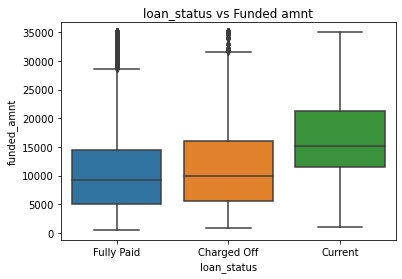

In [12]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

Text(0.5, 1.0, 'purpose vs funded amount')

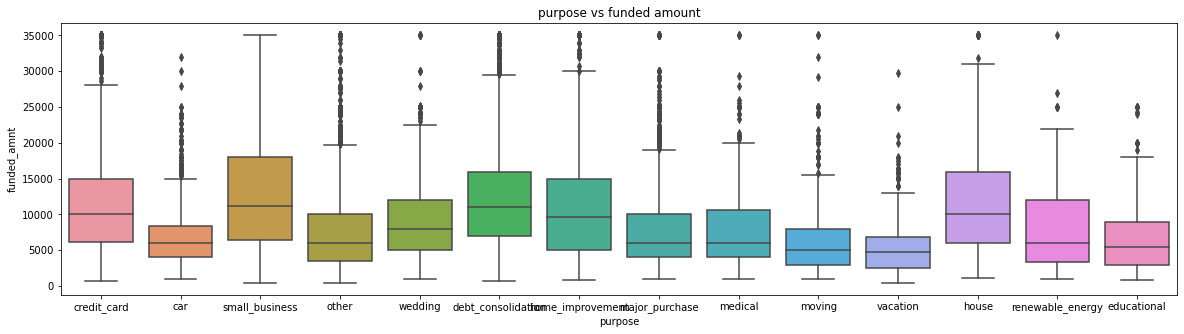

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')

Text(0.5, 1.0, 'emp_length vs funded amount')

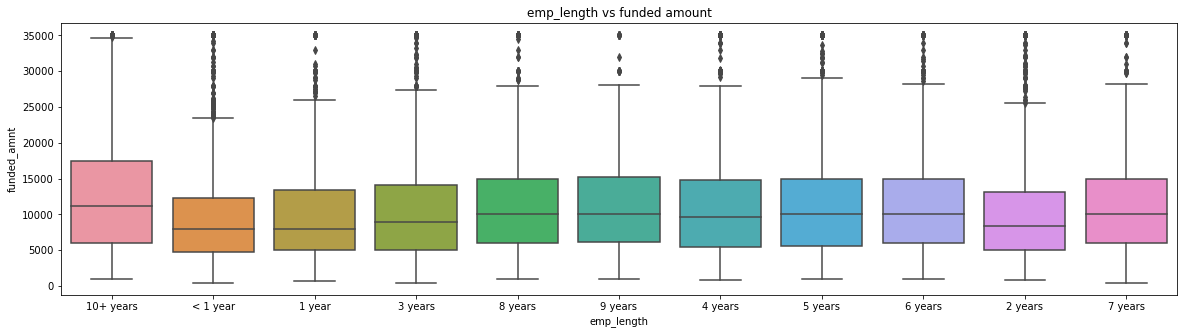

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

# annual_inc

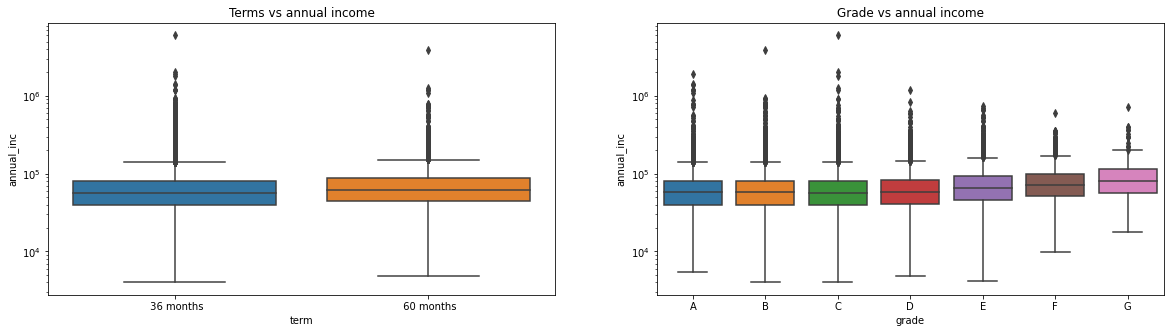

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

Observations:Comparatively Annual income is higher for lower grades.

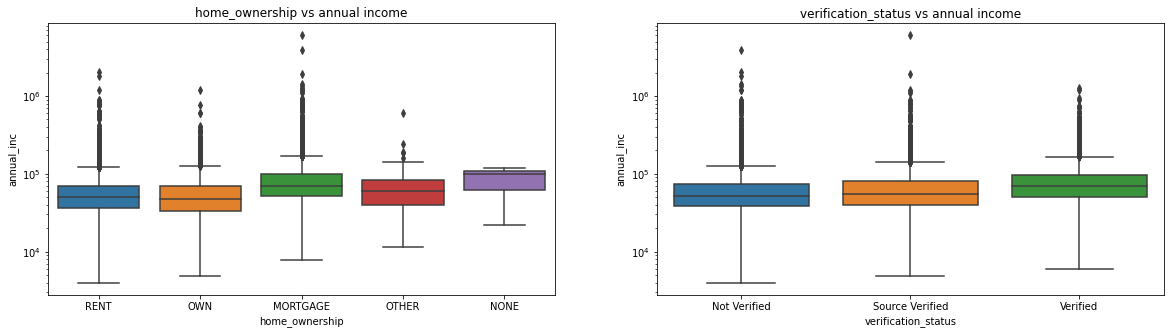

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

Observations:
The home ownership status for MORTAGE has higher income.
The income source was verfied for most of the borrower's who had higher annual incomes.

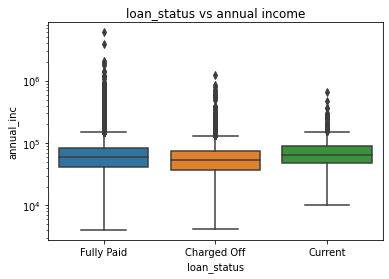

In [19]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

Observations: Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

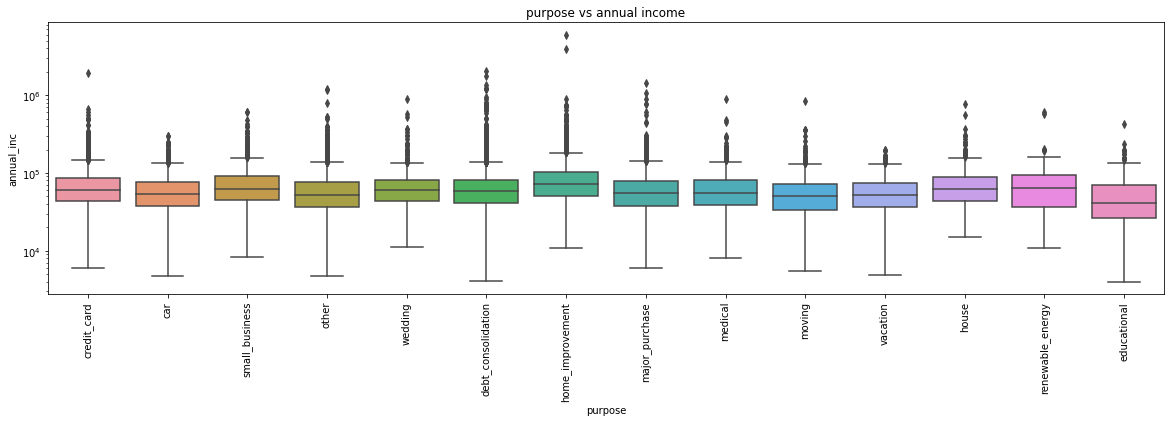

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

Observations: A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

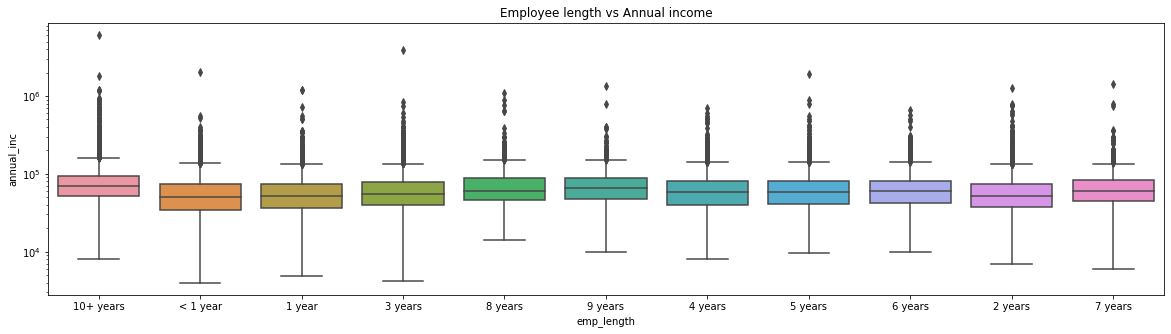

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

Observations: The borrower's who has higer income have taken loans for 10+ years of duration.

# pub_rec_bankruptcies
Number of public record bankruptcies

C:\Users\Anurag Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anurag Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Grade vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

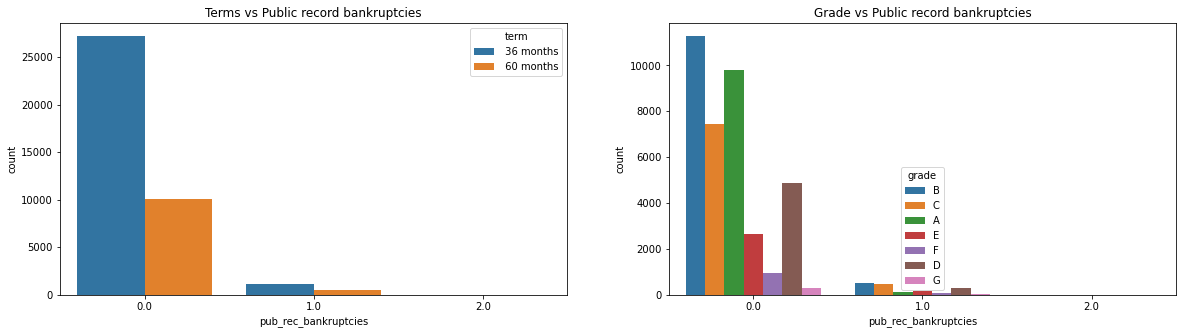

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='term', data=data)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='grade', data=data)

C:\Users\Anurag Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anurag Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Verification status vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

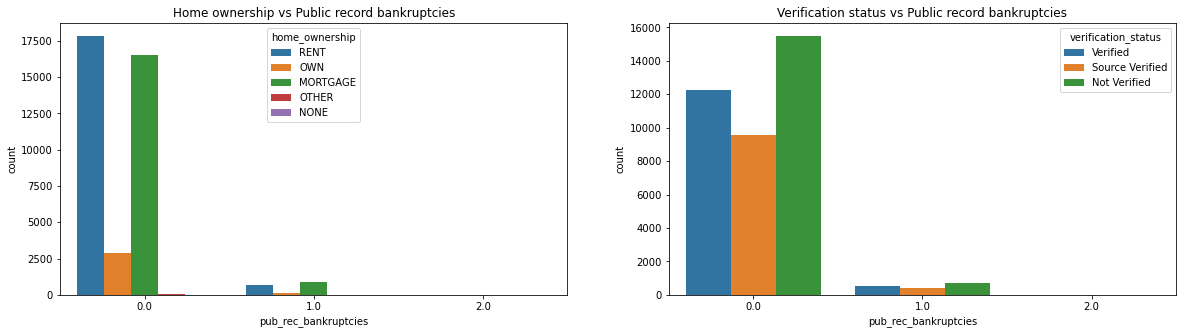

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)

C:\Users\Anurag Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

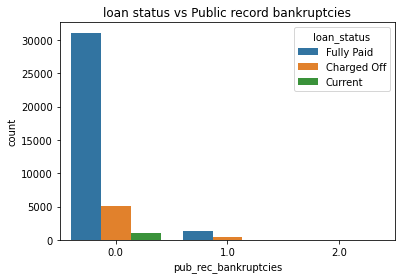

In [24]:
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('loan status vs Public record bankruptcies')

C:\Users\Anurag Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

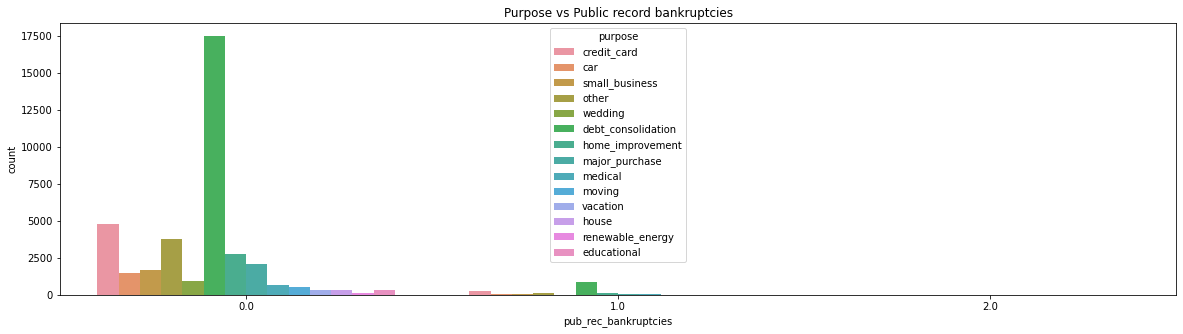

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')

C:\Users\Anurag Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

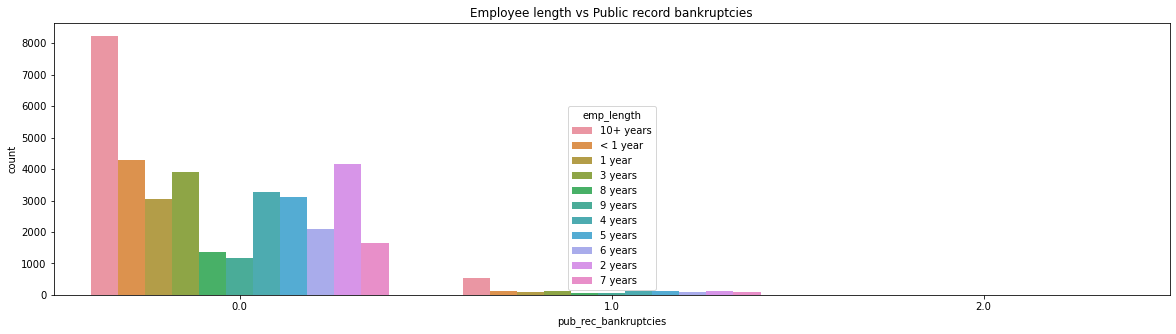

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')

# Bivariate Analysis
## Term vs Loan Status

C:\Users\ANURAG~1\AppData\Local\Temp/ipykernel_1788/4274992404.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Term vs Loan status')

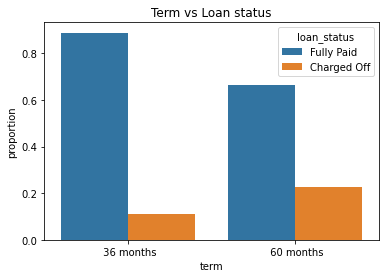

In [27]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

Observations: Looks like there are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

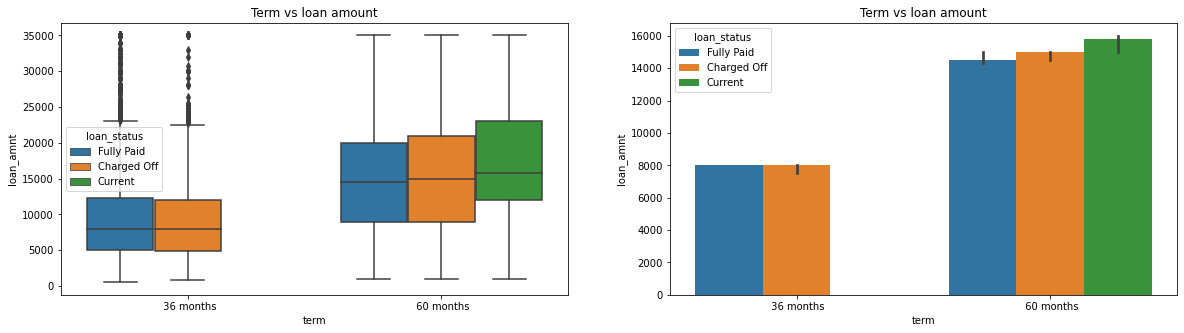

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

Observations: Loan amount is not a decider for defaults in both 36 adn 60 months.
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

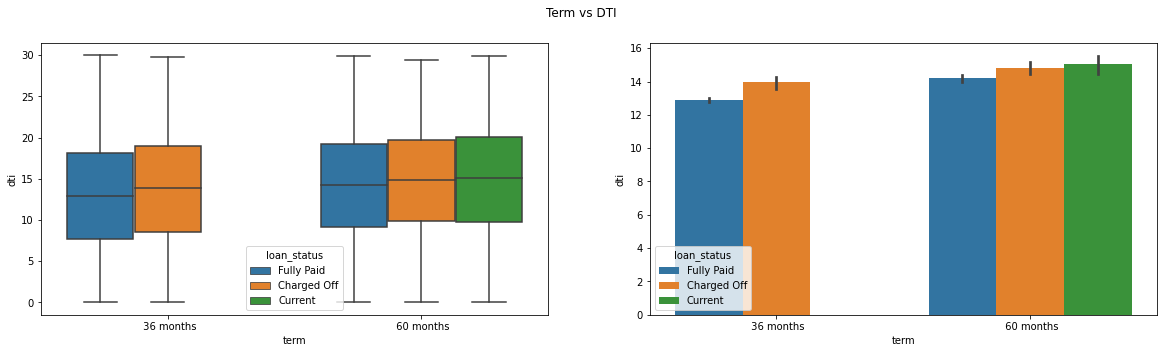

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

Observations: Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

## Grade

In [31]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

C:\Users\ANURAG~1\AppData\Local\Temp/ipykernel_1788/2522014393.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

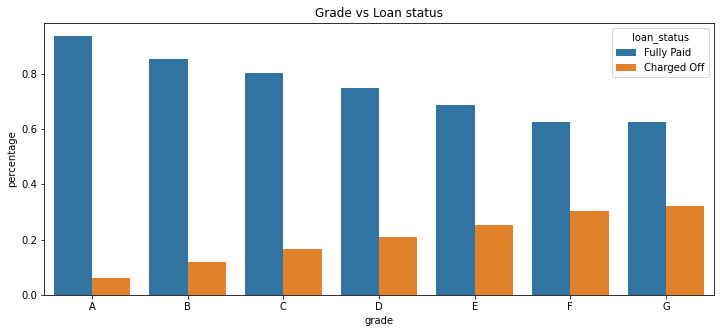

In [32]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

Observations: The above graph clearly says the Charged off increases as grades decreases.

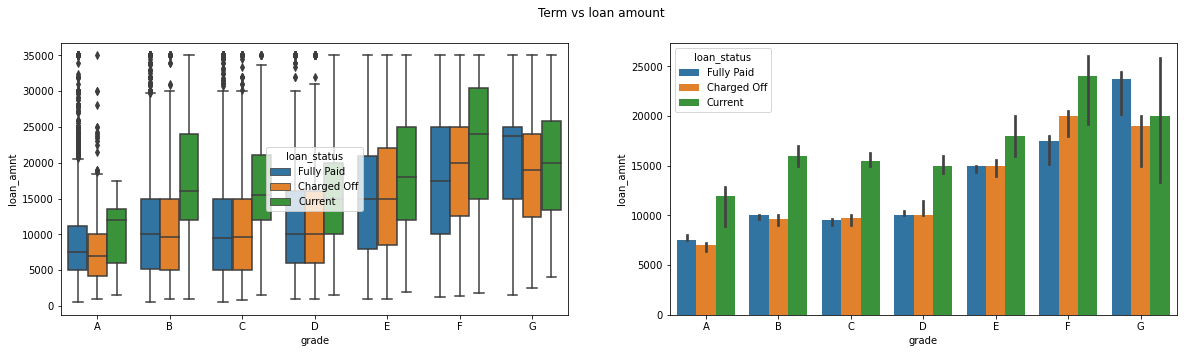

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

Observations: For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.
              The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

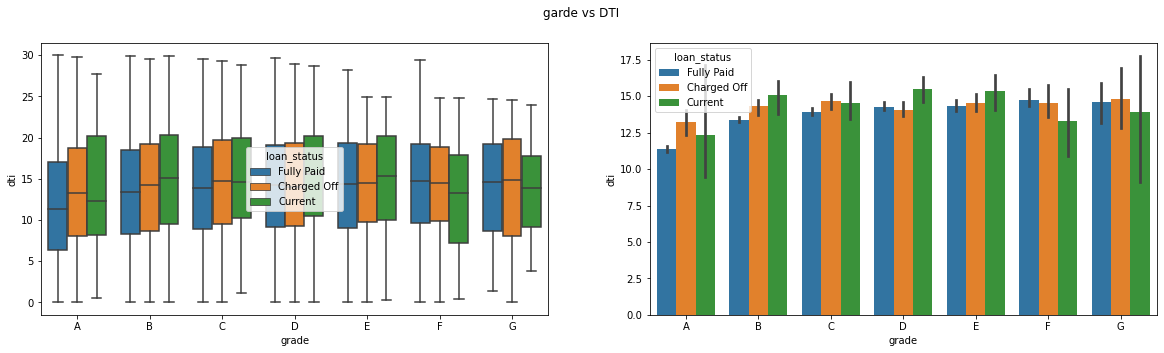

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

Observations: There is not much change in dti in each grade and loan status.

## Employment Length

C:\Users\ANURAG~1\AppData\Local\Temp/ipykernel_1788/3756688468.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

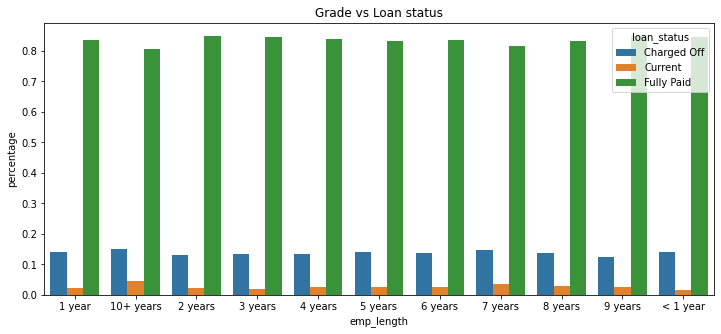

In [36]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

Observations: There is not big changes or pattern observed defaulters across employment lengths.

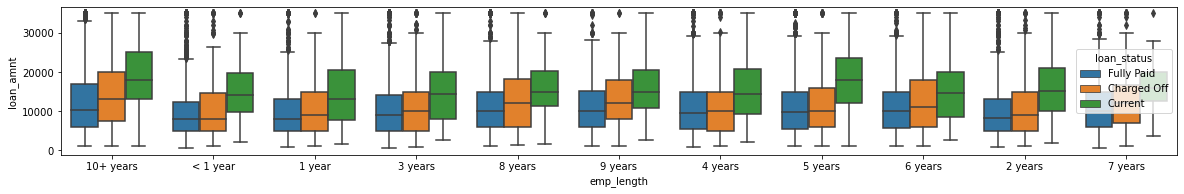

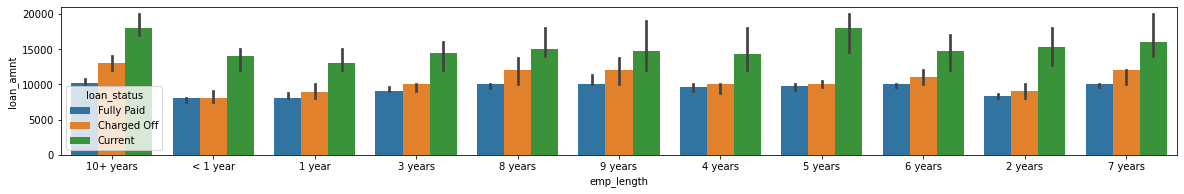

In [37]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

Observations: Borrowers with higher employment lengths and took more loan amounts got more default rate.

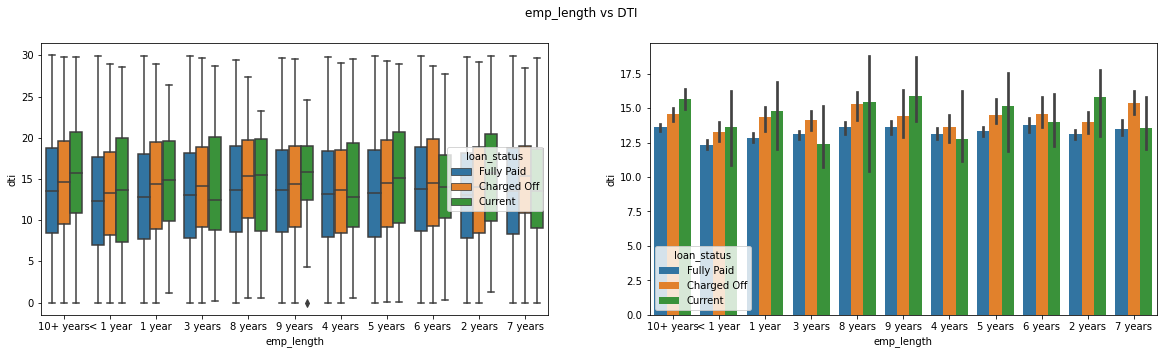

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

Observations: Employment Length and DTI are not showing any patterns towards defaults.

### Home Ownership

C:\Users\ANURAG~1\AppData\Local\Temp/ipykernel_1788/2695638706.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Home Ownership vs Loan status')

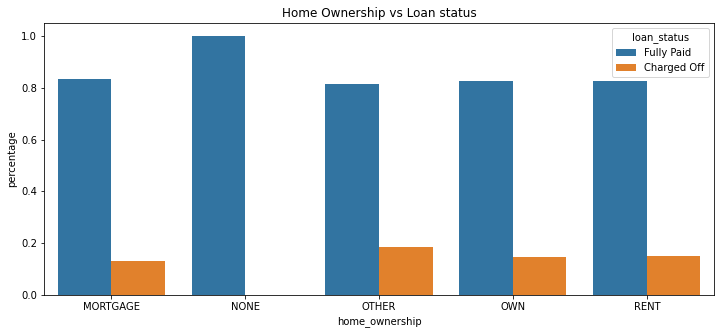

In [40]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')Loan Amount vs Interest Rate

Observations: There is bit high percentage of defaults are recorded in other home ownership category.

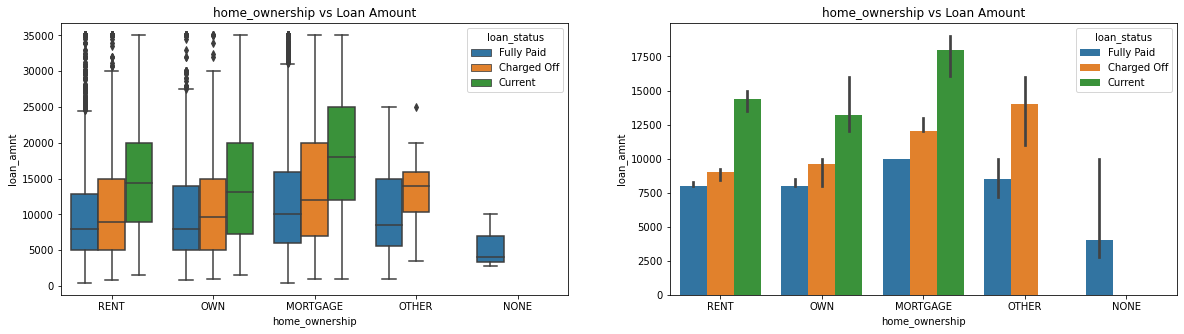

In [42]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

Observations: Borrowers who took higher loan amounts defaulted more than others.

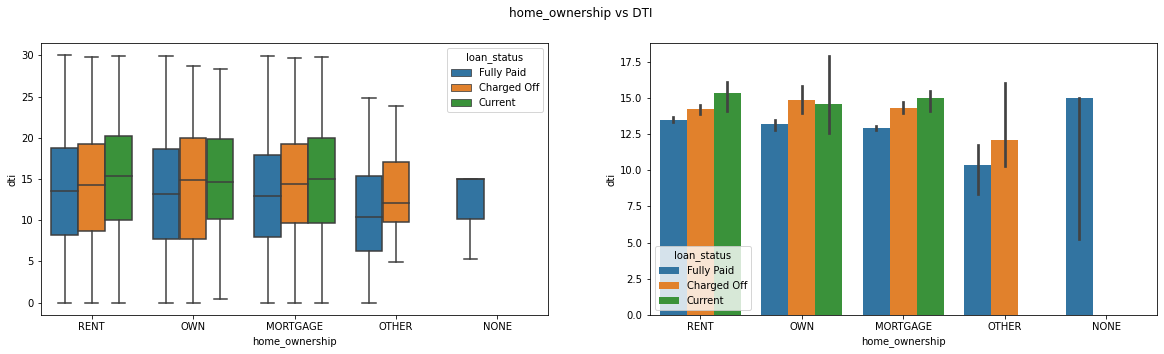

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

Observations: Borrowers in other home ownership category has less dti than other categories. There is equal posibility of home owners defaulting for all the home ownerships.

### Address State

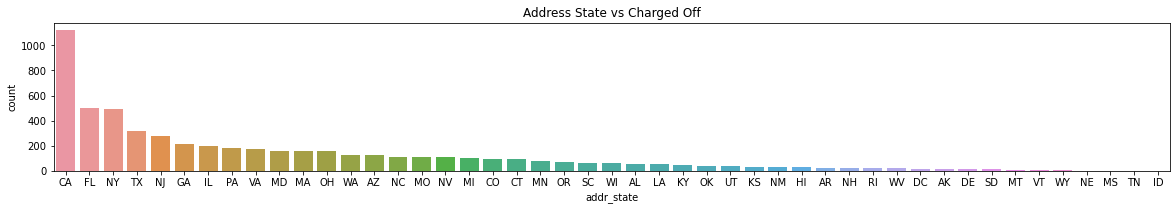

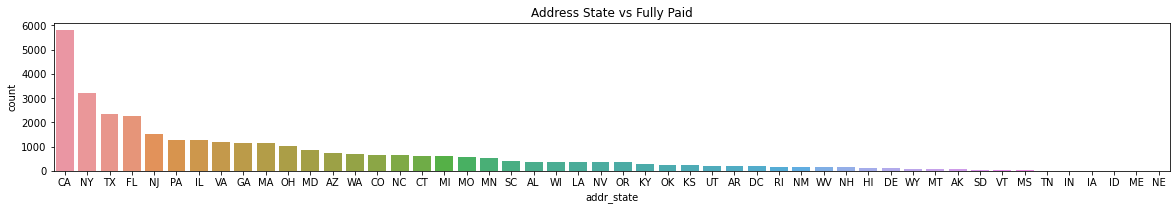

In [44]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

Observations: More number of borrowers defaulted in CA , FL and NY states.

### Verfication Status

C:\Users\ANURAG~1\AppData\Local\Temp/ipykernel_1788/3592038875.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

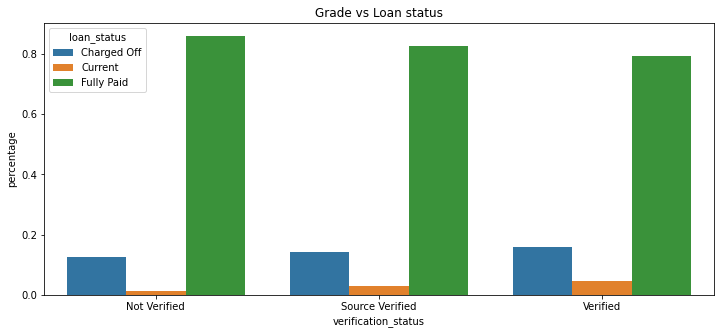

In [45]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

Observations: There isn't big change in charged of loans for all varification status.

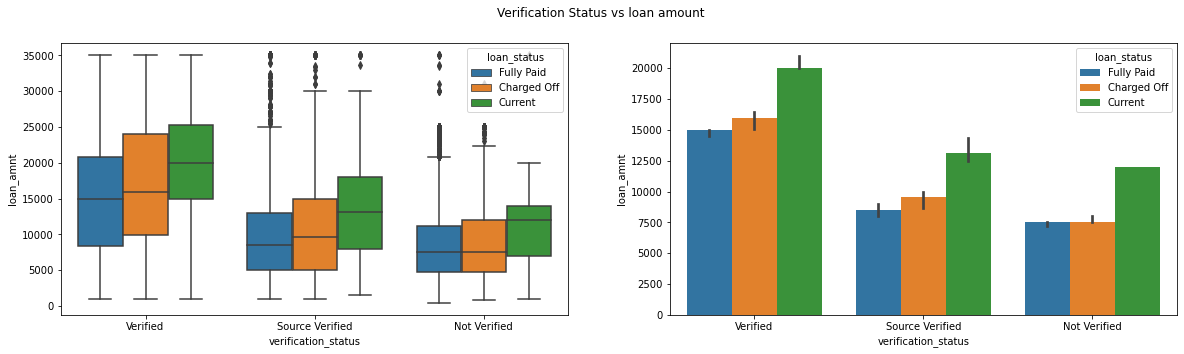

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

Observations: Verified loans are given more loan amounts compared to others. There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

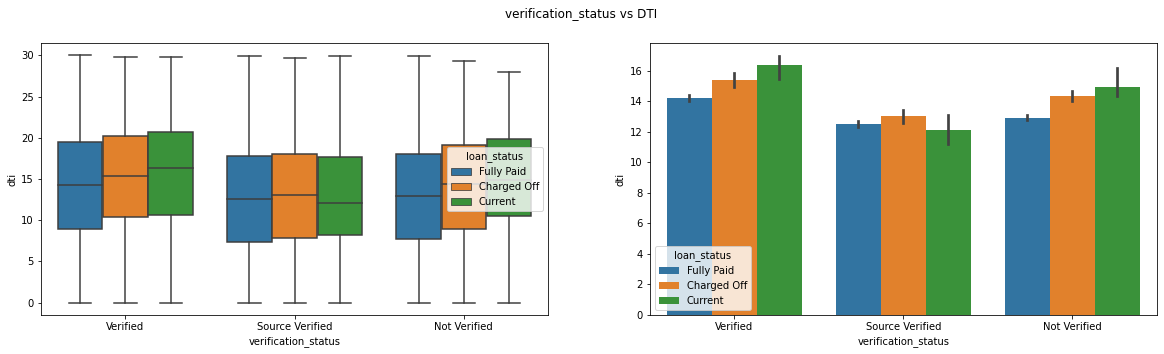

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

Observations: There is slight increase in the dti mean for defaulted laons for all the verification status categories.

## Correlation Matrix

Let's find the correlation between the variables/columns of out data set

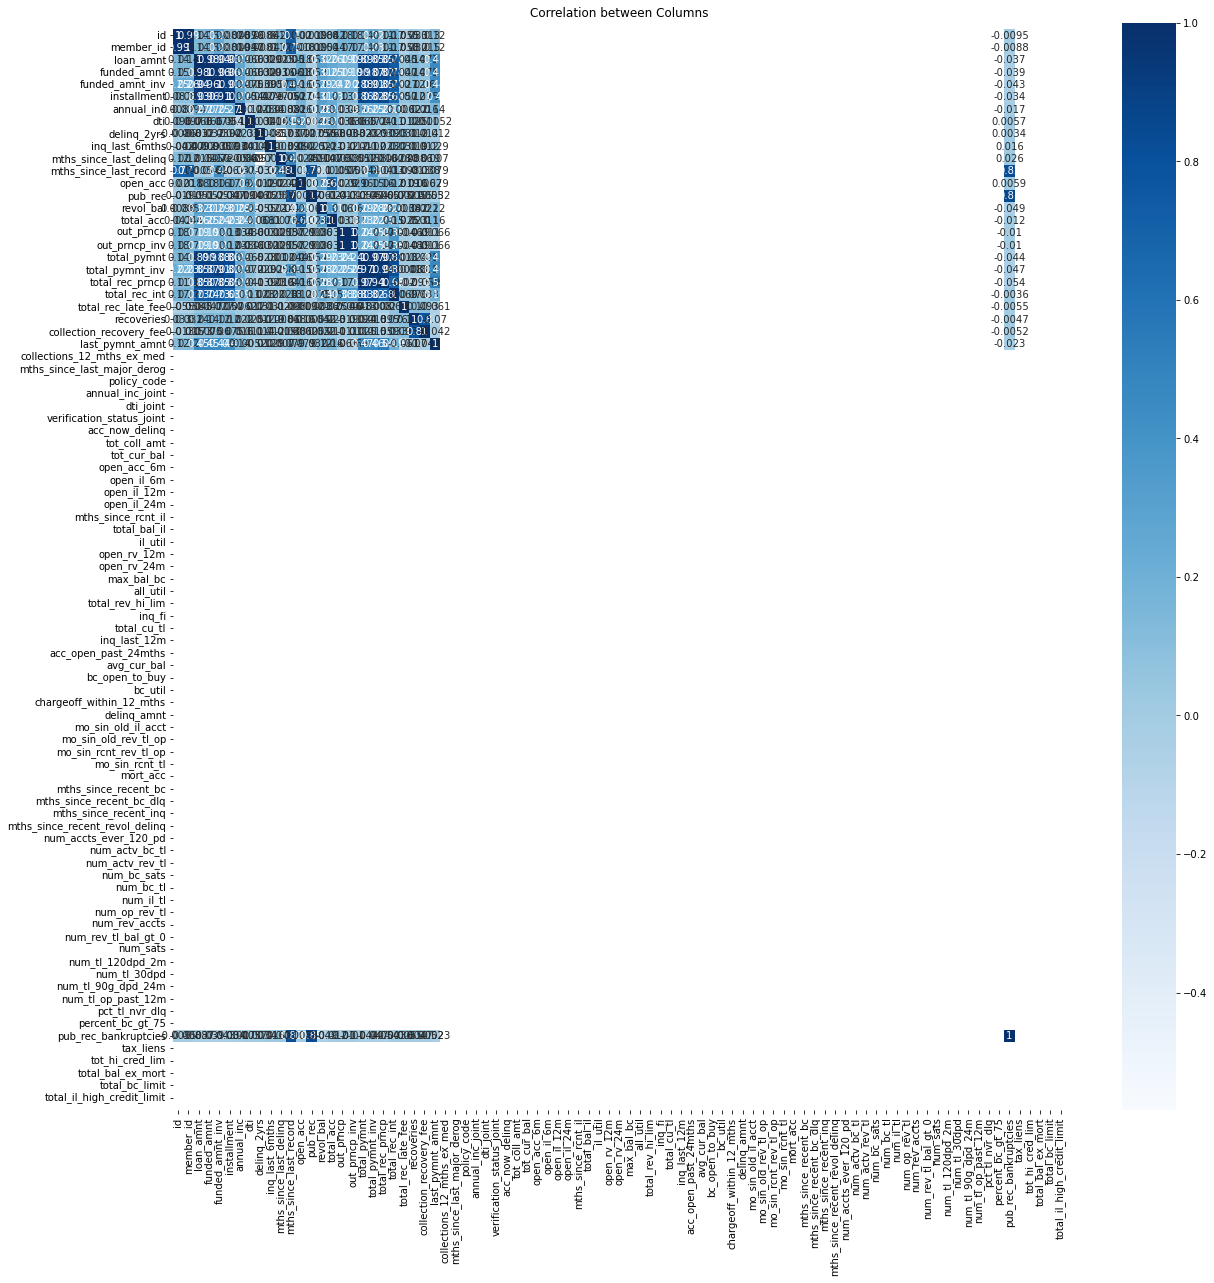

In [51]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()


### Conclusions:
- Lending club should reduce the high interest loans for 60 months tenure, they are prone to loan default.
- Grades are good metric for detecting defaulters. Lending club should examine more information from borrowers before issuing loans to Low grade (G to A).
- Lending Club should control their number of loan issues to borrowers who are from CA, FL and NY to make profits.
- Small business loans are defaulted more. Lending club should stop/reduce issuing the loans to them.
- Borrowers with mortgage home ownership are taking higher loans and defaulting the approved loans. Lending club should stop giving loans to this category when loan amount requested is more than 12000.
- People with more number of public derogatory records are having more chance of filing a bankruptcy. Lending club should make sure there are no public derogatory records for borrower.



# Thankyou